<a href="https://colab.research.google.com/github/Mayroseant/Marketing-Campaign-for-Banking-Products/blob/master/Marketing_Campaign_for_Banking_Products_Mayrose_Antony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MARKETING CAMPAIGN FOR BANKING PRODUCTS

Dataset provided : 
https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

### Problem Statement

Creating a Machine Learning model to predict the likelihood of a liability customer buying personal loans from the bank thereby enhancing the marketing campaign of the bank.

Machine Learning Algorithms used : We will be using Classification Machine Learning Algorithms to the dataset as the end outcome is categorical value (Yes/No).

## STEP 1

### 1.1 Importing the Libraries

In [ ]:
import pandas as pd                     # for data manipulation
import numpy as np                      # for scientific computing
import matplotlib.pyplot as plt         # for plotting graphs
import seaborn as sns                   # data visualization
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2 Importing the Dataset

####Description of the dataset

In [ ]:
description = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", "Description")

In [ ]:
description

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Data Description:,NaN
5,NaN,NaN,NaN
6,NaN,ID,Customer ID
7,NaN,Age,Customer's age in completed years
8,NaN,Experience,#years of professional experience
9,NaN,Income,Annual income of the customer ($000)


In [ ]:
description.drop('Unnamed: 0', axis = 1, inplace = True)
description.drop(index=[0, 1, 2, 3, 4, 5], axis = 0, inplace = True)
description.rename(columns = {'Unnamed: 1':'Name','Unnamed: 2':'Description'}, inplace = True)
description

,Name,Description
6,ID,Customer ID
7,Age,Customer's age in completed years
8,Experience,#years of professional experience
9,Income,Annual income of the customer ($000)
10,ZIPCode,Home Address ZIP code.
11,Family,Family size of the customer
12,CCAvg,Avg. spending on credit cards per month ($000)
13,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...
14,Mortgage,Value of house mortgage if any. ($000)
15,Personal Loan,Did this customer accept the personal loan off...


In [ ]:
dataset = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", "Data")

In [ ]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### 1.3 Datatype of each columns in the dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 1.4 Statistical summary of the dataset

In [ ]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 1.5 Shape of dataset (Dimensions)

In [ ]:
dataset.shape

(5000, 14)

### 1.6 Checking if there are any missing values in the dataset

In [ ]:
dataset.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

## STEP 2

### Data Cleaning

There are no missing or null values in the dataset.

In [ ]:
features = dataset.drop("Personal Loan", axis=1)       # independent variables - X
target = dataset["Personal Loan"]                      # dependent variable - y

dataset = features.join(target)                        # final dataset

In [ ]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [ ]:
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0


In [ ]:
experience = dataset["Experience"]
age = dataset["Age"]
correlation = experience.corr(age)
correlation

0.9942148569683321

In [ ]:
dataset = dataset.drop(["ID", "Experience"],axis = 1)

In [ ]:
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1,0


In [ ]:
dataset.tail()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
4995,29,40,92697,1,1.9,3,0,0,0,1,0,0
4996,30,15,92037,4,0.4,1,85,0,0,1,0,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,1,0,0
4999,28,83,92612,3,0.8,1,0,0,0,1,1,0


## STEP 3

###Exploratory Data Analysis (EDA)

### 3.1 Unique Values in each column

In [ ]:
listItem = []
for col in dataset.columns :
    listItem.append([col,
                     dataset[col].dtype,
                     dataset[col].isna().sum(),
                     round((dataset[col].isna().sum()/len(dataset[col])) * 100,2),
                     dataset[col].nunique(),
                     list(dataset[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Age,int64,0,0.0,45,"[25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 5..."
1,Income,int64,0,0.0,162,"[49, 34, 11, 100, 45, 29, 72, 22, 81, 180, 105..."
2,ZIP Code,int64,0,0.0,467,"[91107, 90089, 94720, 94112, 91330, 92121, 917..."
3,Family,int64,0,0.0,4,"[4, 3, 1, 2]"
4,CCAvg,float64,0,0.0,108,"[1.6, 1.5, 1.0, 2.7, 0.4, 0.3, 0.6, 8.9, 2.4, ..."
5,Education,int64,0,0.0,3,"[1, 2, 3]"
6,Mortgage,int64,0,0.0,347,"[0, 155, 104, 134, 111, 260, 163, 159, 97, 122..."
7,Securities Account,int64,0,0.0,2,"[1, 0]"
8,CD Account,int64,0,0.0,2,"[0, 1]"
9,Online,int64,0,0.0,2,"[0, 1]"


In [ ]:
sum(map(lambda i: i == 0, dataset["Mortgage"]))

3462

In [ ]:
sum(map(lambda i: i == 0, dataset["CreditCard"]))

3530

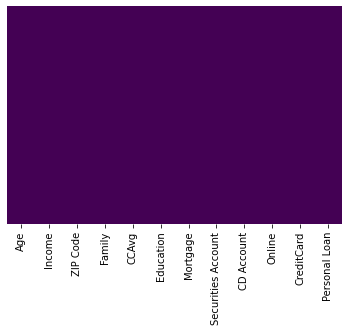

In [ ]:
sns.heatmap(dataset.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
features = dataset.drop(["Personal Loan"],axis=1)
target = dataset["Personal Loan"]

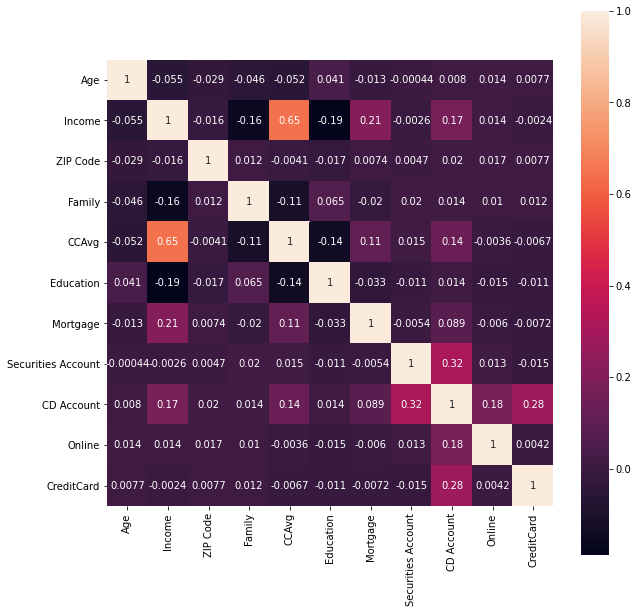

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(features.corr(),annot=True,square=True)

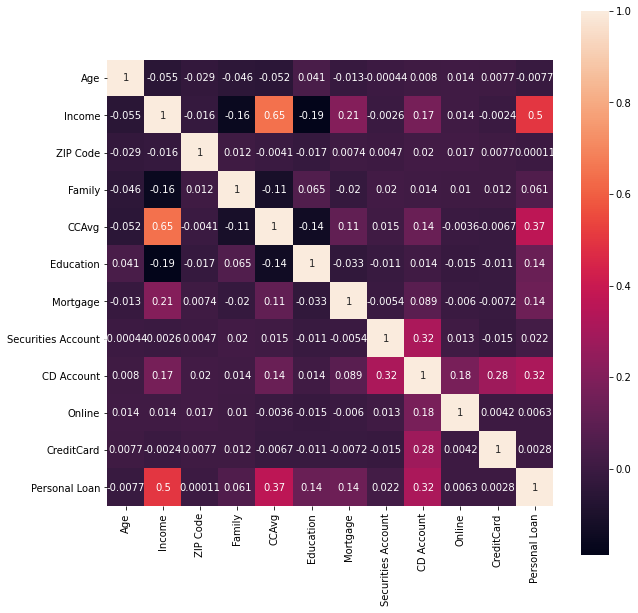

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(features.join(target).corr(),annot=True,square=True)

Text(0.5, 1.0, 'Mortgage Distribution')

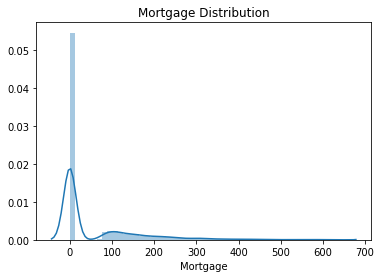

In [ ]:
sns.distplot(features["Mortgage"])
plt.title("Mortgage Distribution")

Text(0.5, 1.0, 'Income Distribution')

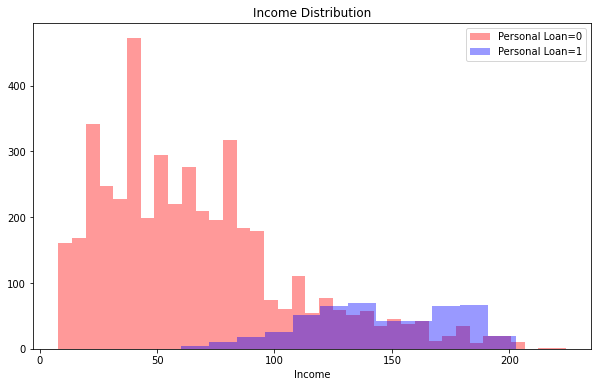

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(dataset[dataset["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(dataset[dataset["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")